# Python Final Project : Sentiment Analysis - Priyanshi Nigam

The webapp with sentiment analysis can be found here: ec2-18-216-203-77.us-east-2.compute.amazonaws.com

In [69]:
import pandas as pd

# Reading Amazon Review Data into Data-Frame
df = pd.read_csv("Amazon_Unlocked_Mobile.csv", encoding='utf-8')

# Rows and Columns in Data
print "Number of rows in dataset: ", df.shape[0]
print "Number of columns in dataset: ", df.shape[1]

df.head(5)

Number of rows in dataset:  413840
Number of columns in dataset:  6


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [70]:
# Importing textblob library

from textblob import TextBlob

In [71]:
# Function to calculate sentiment for given text

def sentiment(text):
        if type(text) == float:
            text = str(text)
        analysis = TextBlob(text)
        return analysis.sentiment.polarity

In [72]:
# Testing sentiment function
print "The sentiment score is: ", sentiment("I am extremely happy.")

# Testing when input is not text
print "The sentiment score is: ", sentiment(5.3333)

The sentiment score is:  0.8
The sentiment score is:  0.0


In [73]:
# Applying sentiment function on each review in data frame and storing in new column *

df['Score'] = df['Reviews'].apply(sentiment)

In [74]:
# Function to see sentiment is postive, negative, or neutral

def pos_neg(f):
    f = round(float(f),2)
    if f>0:
        sentiment=  "Positive" 
    elif f<0:
        sentiment=  "Negative" 
    else:
        sentiment=  "Neutral"
    return sentiment

# Testing pos_neg function
pos_neg(0.3)


'Positive'

In [75]:
# Adding a column showing whether the review is positive, negative, or neutral

df['Sentiment'] = df['Score'].apply(pos_neg)

del df['Review Votes']

In [76]:
# Inspecting data-frame without Review Votes

df.head(5)

,Product Name,Brand Name,Price,Rating,Reviews,Score,Sentiment
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,0.180952,Positive
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.449259,Positive
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.650000,Positive
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.452500,Positive
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.214583,Positive


In [77]:
# Mean by product
df_prod = df[ ['Product Name','Score']].groupby('Product Name').mean().reset_index()

# Mean by brand
df_brand = df[ ['Brand Name','Score']].groupby('Brand Name').mean().reset_index()

print (df_prod.head(2))

# Inspecting data-frame df_brand
print (df_brand.head(2))

print(df_prod.shape, df_brand.shape)

                                        Product Name     Score
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...  0.341040
1  "Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...  0.256721
               Brand Name     Score
0                    AKUA  0.475833
1  AMM Global Enterprises  0.293398
((4410, 2), (384, 2))


In [78]:
# Top 25 brands
df_brand25 = df_brand.sort_values('Score', ascending = False).head(25).reset_index()

# Top 25 products
df_prod25 = df_prod.sort_values('Score', ascending = False).head(25).reset_index()

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt

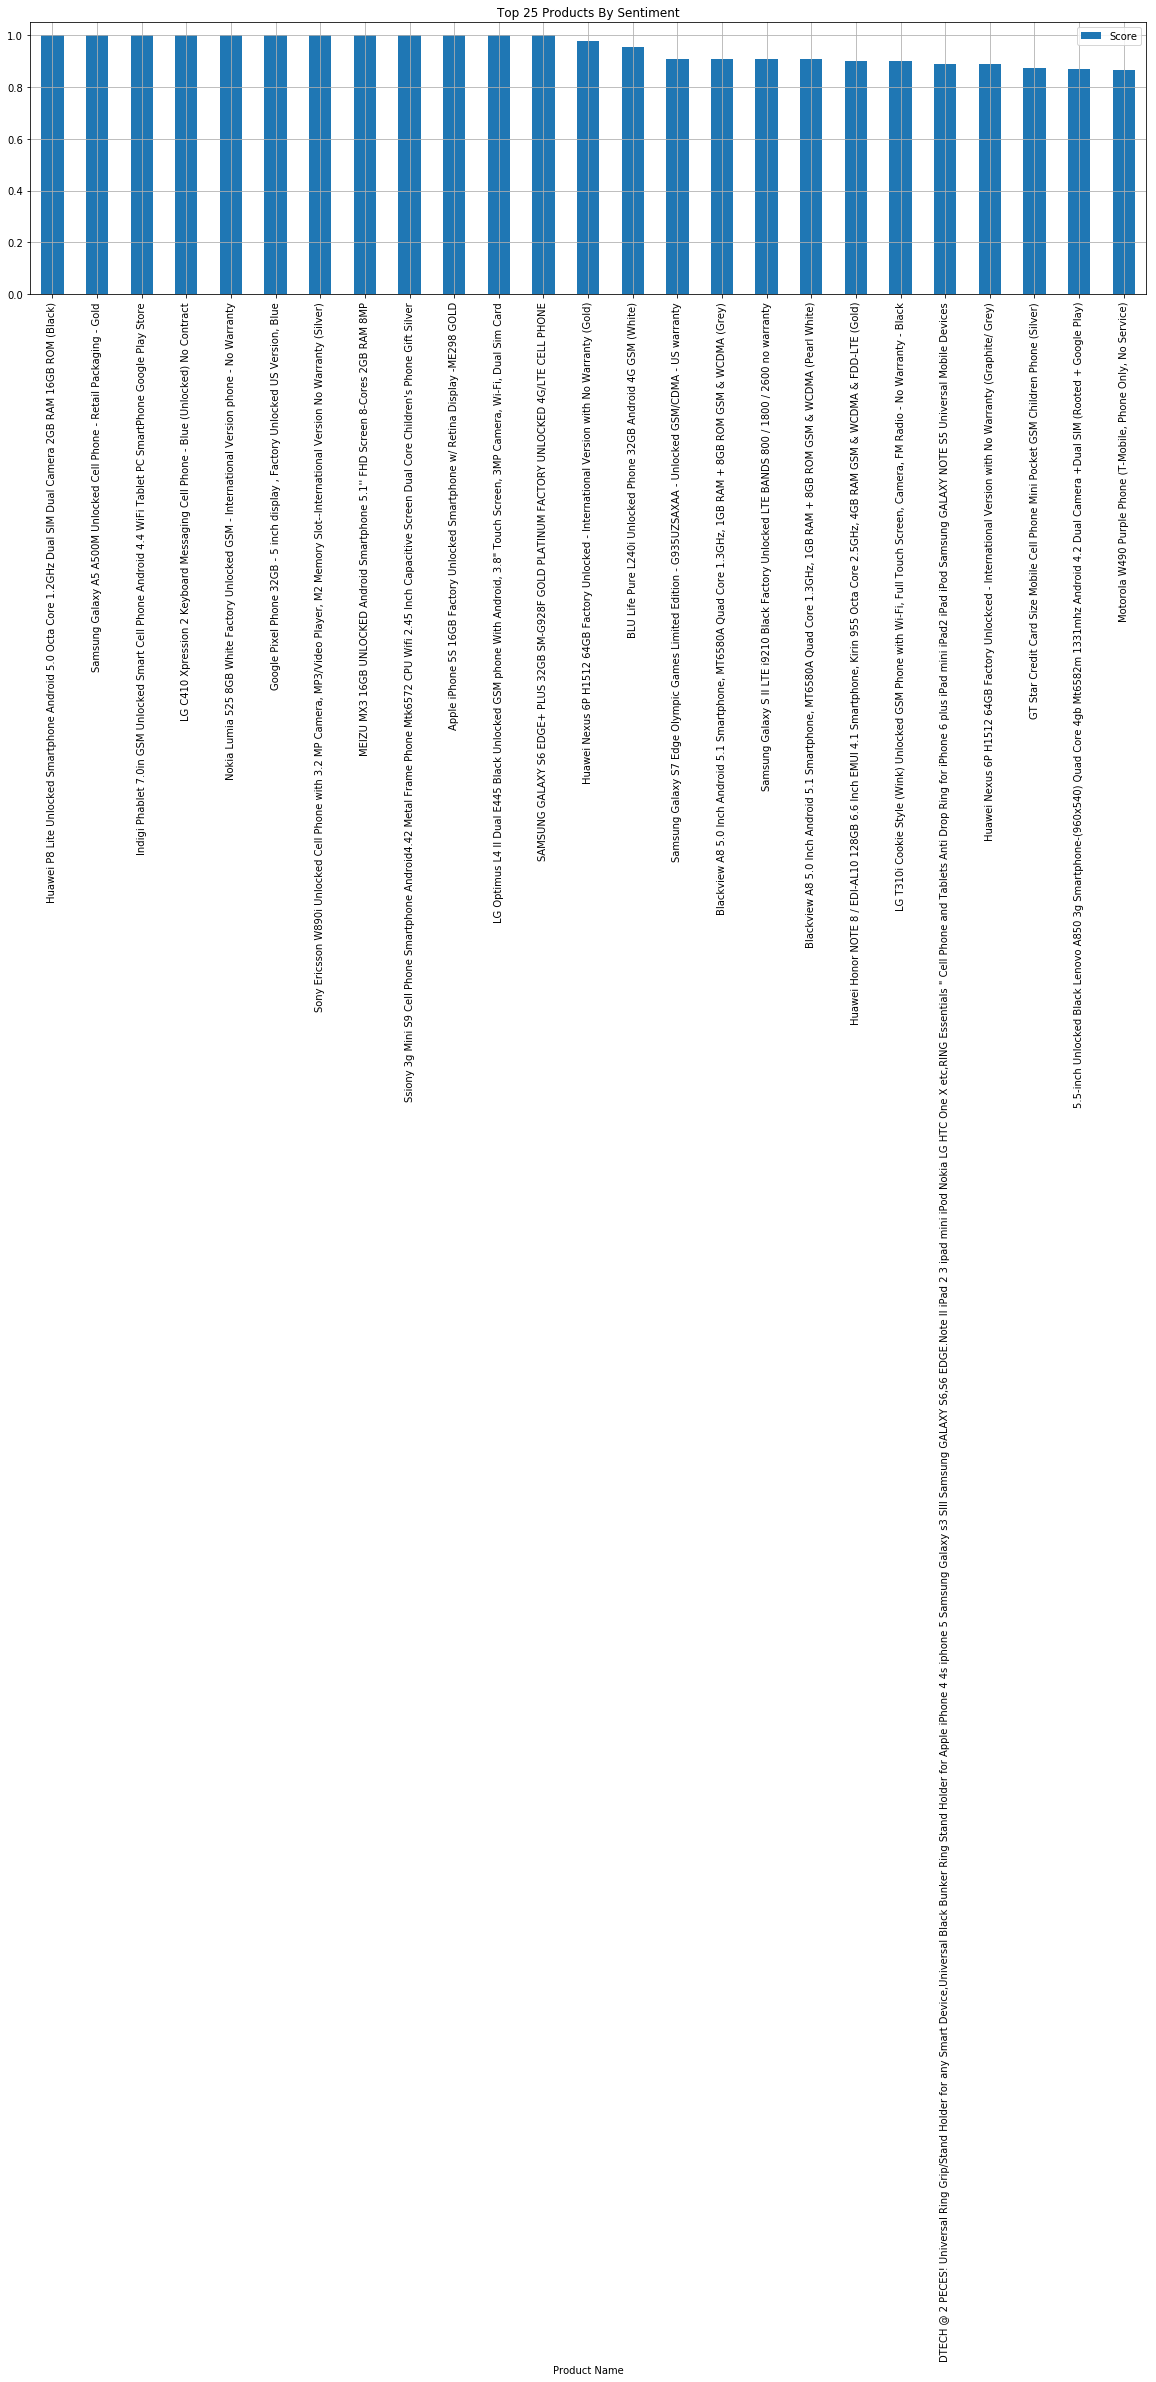

In [80]:
# Plotting scores for top 25 products

df_prod25.plot(x='Product Name', y='Score', figsize=(20,5), grid=True, kind = 'bar'
               , title = 'Top 25 Products By Sentiment')

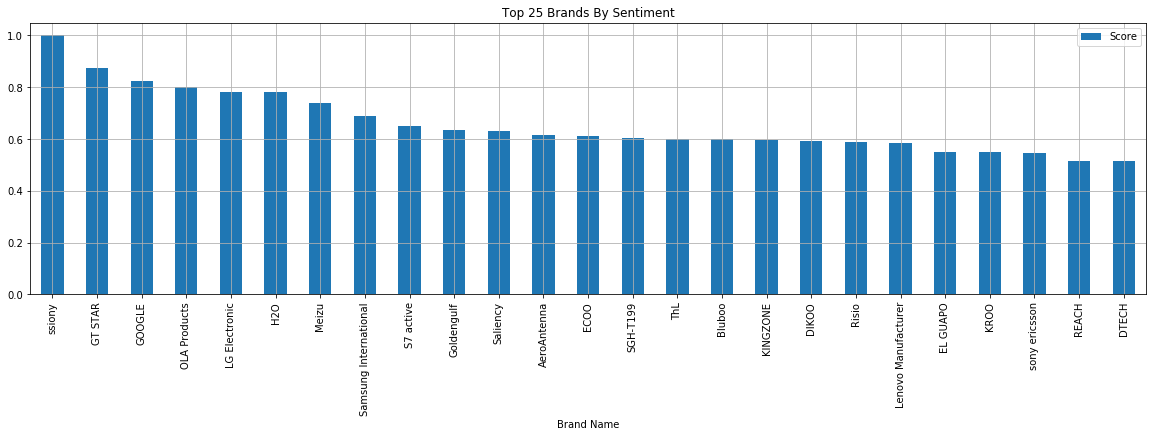

In [81]:
# Plotting scores for top 25 brands

df_brand25.plot(x='Brand Name', y='Score', figsize=(20,5), grid=True, kind = 'bar',title = 'Top 25 Brands By Sentiment')

In [82]:
# Reading Brand Name for sentiment
b = raw_input('Enter a brand name: ')


Enter a brand name: Google


In [83]:
# Printing Sentiment for Brand

# brand_val = 'Samsung'
print 'Brand Name: ', b
b_score = df_brand[df_brand['Brand Name'] == b]['Score'].values[0]
b_percent = 100*(b_score)
b_sentiment= pos_neg(b_score).lower()
symbol = "%"
print "The average sentiment for phones(in the dataset) of the brand %s is %0.4s%s %s." % (b, b_percent, symbol, b_sentiment)

Brand Name:  Google
The average sentiment for phones(in the dataset) of the brand Google is 41.1% positive.
